In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('mydata2.csv')

In [4]:
df

,name,description,latitude,longitude,color
0,実家,"松島家が住んでいる実家！この家にはmother,sister,dogが住んでいる！My do...",35.803464,139.977446,red
1,最寄り駅,ここは自宅から一番近い五香駅！出かけるときはいつもお世話になっている。しかし駅員の態度があま...,35.797385,139.965789,green
2,兎に角,ここは食べた中で一番おいしいと感じた油そばの店！油そばの中では一番美味しかった！しかもレモン...,35.786058,139.901769,pink
3,誉,ここは食べた中で一番美味しかった背油系ラーメンの店！いう事ないくらいおいしい！最高にハイって...,35.860532,139.968797,pink
4,神道家,ここは食べた中で一番美味しかった家系ラーメンの店！この店はすするTVというラーメン系Yout...,35.924358,139.894645,pink
5,草津温泉,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",36.625000,138.594000,blue
6,お父さんの家付近,お父さんは今単身赴任でお母さんの故郷である広島で仕事している。一か月に一回帰ってくる！お父さ...,34.384970,132.441161,red
7,積善館,ここはマジで人生で一回は行きたい温泉！ここはジブリ映画である「千と千尋の神隠し」の舞台になっ...,36.686433,138.773794,blue
8,日本武道館,ここは様々なライブで使われている日本人で生まれ、そして日本で活動しているアーティストは一度は...,35.693421,139.749740,orange
9,城山ホテル 鹿児島,このホテルはまじですごいホテル！このホテルはどうやら四つ星ホテルらしいです、、。今まで泊まっ...,31.595327,130.547000,beige


In [5]:
df.shape

(10, 5)

In [6]:
for index, row in df.iterrows():
    print(row['name'])

実家
最寄り駅
兎に角
誉
神道家
草津温泉
お父さんの家付近
積善館
日本武道館
城山ホテル　鹿児島


In [7]:
for index, row in df.iterrows():
    print(row['name'],row['latitude'],row['longitude'])

実家 35.80346378 139.9774461
最寄り駅 35.79738499 139.9657895
兎に角 35.78605794 139.9017693
誉 35.86053156 139.9687967
神道家 35.92435781 139.8946452
草津温泉 36.625 138.594
お父さんの家付近 34.38497047 132.4411613
積善館 36.68643345 138.7737943
日本武道館 35.69342149 139.7497398
城山ホテル　鹿児島 31.59532678 130.547


In [9]:
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

print(center_lat,center_lon)

35.415694826999996 137.98141422



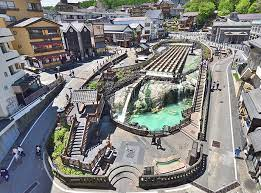

In [19]:
m = folium.Map(location=[center_lat,center_lon], zoom_start=6)

# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, 
                  popup='<div style="width:350px">'+row['description']+'</div>', 
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['color']
                )).add_to(m)

# show the map
m


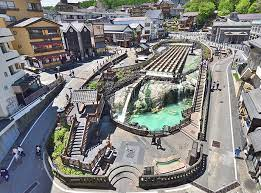

In [23]:
m = folium.Map(location=[center_lat,center_lon], 
               zoom_start=6,
               attr = '国土地理院')

# add basemaps
folium.TileLayer(name='2007年以降',tiles='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1987年～1990年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1984年～1986年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo3/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1979年～1983年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo2/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1974年～1978年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo1/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1961年～1969年',tiles='https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png',attr='国土地理院').add_to(m)

# basemapが選べるボタンをマップに足す
folium.LayerControl().add_to(m)

# add points
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, popup='<div style="width:350px">'+row['description']+'</div>', tooltip=row['name'],icon=folium.Icon(color=row['color'])).add_to(m)

# show the map
m

In [24]:
m.save('map.html')

僕が好きな場所をすべて書きました！本当の事言うとファイルのインポートに一番時間かかりました（笑）

